# Graphing Decision Trees and Decision Boundaries

### We'll explore various ways to calculate decision tree splits. A decision tree will tell us how to navigate our features to arrive at a decision, whereas a decision boundary will show us how those features split.

In [1]:
import _plotting

from matplotlib import pyplot as plt
import pandas
import sklearn.tree

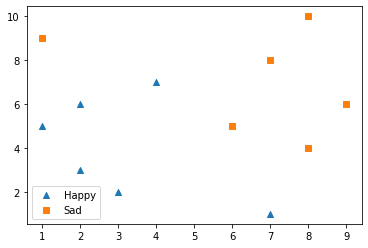

In [2]:
dict_data = {
    'x_0':[7,3,2,1,2,4,1,8,6,7,8,9],
    'x_1':[1,2,3,5,6,7,9,10,5,8,4,6],
    'y': [0,0,0,0,0,0,1,1,1,1,1,1]
    }
data = pandas.DataFrame(dict_data)

columns_features = ['x_0', 'x_1']
features = data[columns_features].values
labels = data['y'].values

# Plot the original set
_plotting.plot_scatter(data['x_0'][labels == 0], data['x_1'][labels == 0], marker = '^')
_plotting.plot_scatter(data['x_0'][labels == 1], data['x_1'][labels == 1], marker = 's')
plt.legend(["Happy", "Sad"])

## Building a decision tree using Gini index

In [3]:
decision_tree = sklearn.tree.DecisionTreeClassifier() # Defaults to gini index
decision_tree.fit(features, labels)
decision_tree.score(features, labels)

1.0

[Text(0.5, 0.8333333333333334, 'x_0 <= 5.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.5, 'x_1 <= 8.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x_1 <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

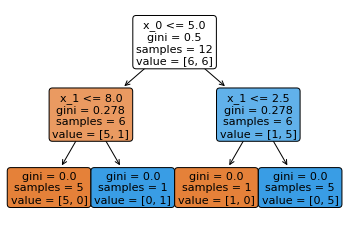

In [4]:
sklearn.tree.plot_tree(decision_tree, feature_names=columns_features, filled=True, rounded=True)

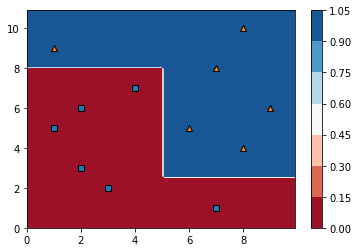

In [5]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree)

## Building a decision tree using entropy

#### How does it compare with the Gini index?

In [6]:
decision_tree_entropy = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(features, labels)
decision_tree_entropy.score(features, labels)

1.0

[Text(0.5, 0.8333333333333334, 'x_0 <= 5.0\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.5, 'x_1 <= 8.0\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x_1 <= 2.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

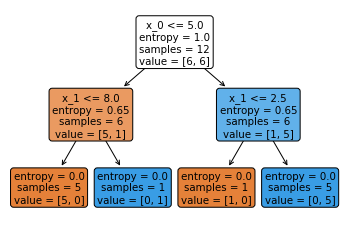

In [7]:
sklearn.tree.plot_tree(decision_tree_entropy, feature_names=columns_features, filled=True, rounded=True)

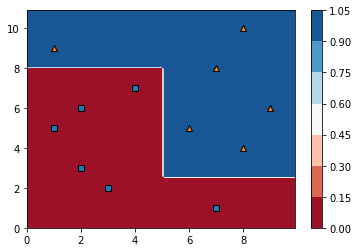

In [8]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree_entropy)

## Building a decision tree of depth one (a vertical or horizontal line)

In [9]:
decision_tree_depth_1 = sklearn.tree.DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)

0.8333333333333334

[Text(0.5, 0.75, 'x_0 <= 5.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]')]

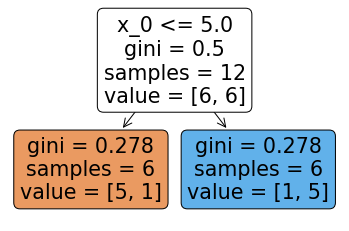

In [10]:
sklearn.tree.plot_tree(decision_tree_depth_1, feature_names=columns_features, filled=True, rounded=True)

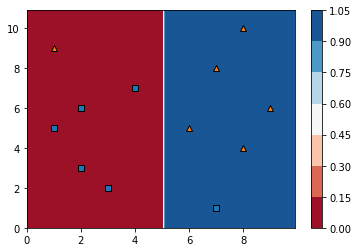

In [11]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree_depth_1)